<a href="https://colab.research.google.com/github/jlb719ru/gisclass/blob/main/jazminbrown_updated_ps0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

United States Violent Murder Data Toals from 1960 to 2019

Plan:
My research will be based on my interested in criminal data and statistics nationwide. I believe, and supposed by statistics, that certain states within the United States have more crime than others. The data that I will be studying looks at state-by-state violent murder data totals that occurred in the United States between 1960 and 2019. The U.S. Department of Justice and the Federal Bureau of Investigation worked together to compile this data for the Unified Crime Reporting Statistics, making it readily available to the public.

Resources:
United States crime data was found at https://corgis-edu.github.io/corgis/csv/state_crime/
My geographic shapefile that I used to create my map was found at https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.3 MB/s eta 0:00:00


In [2]:
state_crime=pd.read_csv('https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv', header=None)


In [3]:
df = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
df = df.drop("Year",axis=1)
df = df.drop("Data.Population",axis=1)
df = df.drop("Data.Rates.Property.All",axis=1)
df = df.drop("Data.Rates.Property.Burglary",axis=1)
df = df.drop("Data.Rates.Property.Larceny",axis=1)
df = df.drop("Data.Rates.Property.Motor",axis=1)
df = df.drop("Data.Rates.Violent.All",axis=1)
df = df.drop("Data.Rates.Violent.Assault",axis=1)
df = df.drop("Data.Rates.Violent.Rape",axis=1)
df = df.drop("Data.Rates.Violent.Robbery",axis=1)
df = df.drop("Data.Rates.Violent.Murder",axis=1)
df = df.drop("Data.Totals.Property.All",axis=1)
df = df.drop("Data.Totals.Property.Burglary",axis=1)
df = df.drop("Data.Totals.Property.Larceny",axis=1)
df = df.drop("Data.Totals.Property.Motor",axis=1)
df = df.drop("Data.Totals.Violent.All",axis=1)
df = df.drop("Data.Totals.Violent.Assault",axis=1)
df = df.drop("Data.Totals.Violent.Rape",axis=1)
df = df.drop("Data.Totals.Violent.Robbery",axis=1)
df

,State,Data.Totals.Violent.Murder
0,Alabama,406
1,Alabama,427
2,Alabama,316
3,Alabama,340
4,Alabama,316
...,...,...
3110,Wyoming,16
3111,Wyoming,20
3112,Wyoming,15
3113,Wyoming,13


In [4]:
! wget -q -O usmap.zip "https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip"
zip_ref = zipfile.ZipFile('usmap.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping


<Axes: >

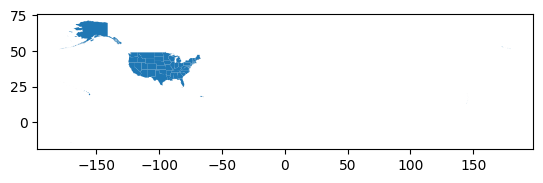

In [5]:

usmap=gpd.read_file('cb_2018_us_state_500k.shp')


usmap.plot()

In [ ]:
#now fixing up the map visuals...

<Axes: >

Text(0.5, 1.0, 'United States Violent Murder Data Totals from 1960 to 2019')

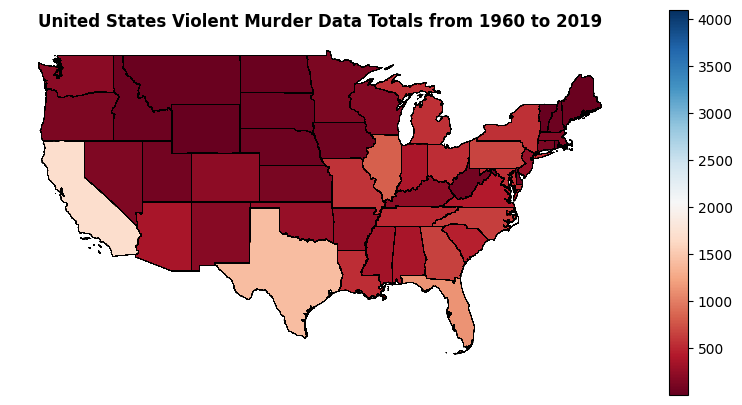

In [ ]:
shape_path = 'https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip'
shape = gpd.read_file(shape_path)
shape = pd.merge(
    left=shape,
    right=df,
    left_on='NAME',
    right_on='State',
    how='left'
)

shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
shape.plot(ax=ax, column='Data.Totals.Violent.Murder', legend=True, cmap='RdBu')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('United States Violent Murder Data Totals from 1960 to 2019', size=12, weight='bold')

plt.show()

Interpretation: After creating this map using the above data and code, it is interpreted that California has the highest violent murder data totals from 1960 to 2019. Following California, the southern states Texas and Florida have the next highest violent murder data totals.

aok: ok but then the color ramp on the right is strange--there are blues but not on the map; also unclear about the title/interpretation: is this 60-19 mean? or median or what? and how is this measured? totals are not most useful--simply larger states will have more crime just because there's more people